## Run DEseq2

In [1]:
ENV["Code"] = "../../Code"
[push!(LOAD_PATH, string(ENV["Code"],"/", ii)) for ii in readdir(ENV["Code"])]

using PyCall
@pyimport matplotlib_venn

using DataFrames
using Seaborn
using NoLongerProblems_Pandas
using NoLongerProblems
using CSV
using RCall
import Pandas
using PrettyPlotting
using NoLongerProblems_Pandas
using HypothesisTests

include("../Databases/Cuartero2018.jl")

rad21wt = Cuartero2018.Cuartero2018Deseq(sample1 = "WTUT", sample2 = "FLUT")
rad21wt_2 = Cuartero2018.Cuartero2018Deseq(sample1 = "WT2", sample2 = "FL2") 
rad21wt_8 = Cuartero2018.Cuartero2018Deseq(sample1 = "WT8", sample2 = "FL8") 
wt_2 = Cuartero2018.Cuartero2018Deseq(sample1 = "WTUT", sample2 = "WT2")
wt_28 = Cuartero2018.Cuartero2018Deseq(sample1 = "WT8", sample2 = "WT2")
wt_8 = Cuartero2018.Cuartero2018Deseq(sample1 = "WTUT", sample2 = "WT8")
rad21_2 = Cuartero2018.Cuartero2018Deseq(sample1 = "FLUT", sample2 = "FL2") 
rad21_28 = Cuartero2018.Cuartero2018Deseq(sample1 = "FL8", sample2 = "FL2") 
rad21_8 = Cuartero2018.Cuartero2018Deseq(sample1 = "FLUT", sample2 = "FL8") 

,EnsemblID,baseMean,log2FoldChange,lfcSE,stat,pvalue
,String31,Float64,Float64,Float64,Float64,Float64
1,ENSMUSG00000074148,5008.55,7.09685,0.218833,32.4305,1.021e-230
2,ENSMUSG00000035042,35650.8,7.91189,0.267176,29.613,1.01623e-192
3,ENSMUSG00000022126,2.89987e5,8.66169,0.314005,27.5845,1.70634e-167
4,ENSMUSG00000089929,1772.09,6.17721,0.225083,27.4441,8.16766e-166
5,ENSMUSG00000074147,1599.09,9.45595,0.35906,26.3353,7.56196e-153
6,ENSMUSG00000017652,41838.6,4.77085,0.184423,25.8691,1.48556e-147
7,ENSMUSG00000026031,57151.5,2.75477,0.111597,24.685,1.55167e-134
8,ENSMUSG00000026822,13700.7,9.43914,0.393959,23.9597,7.32578e-127
9,ENSMUSG00000054203,22209.4,7.17796,0.302835,23.7026,3.3923e-124


##### GO analysis intersection

In [4]:
include("5_GO.jl")

function doGOTests()

universe[!, :Test] = universe[!, :padj].<0.05

perform_goseq(
        universe;
    analysisname = string(labels..., "_DE"),
        genome = "mm9", 
        geneid = "ensGene", 
        plot_fit = false, 
        test_cats = ["GO:BP"])


universe[!, :Test] = (universe[!, :padj].<0.05) .* (universe[!, :log2FoldChange].> 0)

perform_goseq(
        universe;
    analysisname = string(labels..., "_up"),
        genome = "mm9", 
        geneid = "ensGene", 
        plot_fit = false, 
        test_cats = ["GO:BP"])

universe[!, :Test] = (universe[!, :padj].<0.05 ).* (universe[!, :log2FoldChange].< 0)

perform_goseq(
        universe;
    analysisname = string(labels..., "_down"),
        genome = "mm9", 
        geneid = "ensGene", 
        plot_fit = false, 
        test_cats = ["GO:BP"])
    
end


labels = ["Rad21KO_UT__vs__WT_UT"]
universe = rad21wt
doGOTests()

labels = ["Rad21KO_2__vs__WT_2"]
universe = rad21wt_2
doGOTests()

labels = ["Rad21KO_8__vs__WT_8"]
universe = rad21wt_8
doGOTests()

labels = ["WT_2__vs__WT_UT"]
universe = wt_2
doGOTests()


labels = ["WT_8__vs__WT_2"]
universe = wt_28
doGOTests()


labels = ["WT_8__vs__WT_UT"]
universe = wt_8
doGOTests()

labels = ["Rad21KO_2__vs__Rad21KO_UT"]
universe = rad21_2
doGOTests()

labels = ["Rad21KO_8__vs__Rad21KO_UT"]
universe = rad21_8
doGOTests()

labels = ["Rad21KO_8__vs__Rad21KO_2"]
universe = rad21_28
doGOTests()


┌ Warning: RCall.jl: Loading mm9 length data...
│ Warning in pcls(G) :
│   initial point very close to some inequality constraints
│ Fetching GO annotations...
│ For 2493 genes, we could not find any categories. These genes will be excluded.
│ To force their use, please run with use_genes_without_cat=TRUE (see documentation).
│ This was the default behavior for version 1.15.1 and earlier.
│ Calculating the p-values...
│ 'select()' returned 1:1 mapping between keys and columns
└ @ RCall /Users/irr15/.julia/packages/RCall/iMDW2/src/io.jl:160
┌ Warning: RCall.jl: Loading mm9 length data...
│ Warning in pcls(G) :
│   initial point very close to some inequality constraints
│ Fetching GO annotations...
│ For 2493 genes, we could not find any categories. These genes will be excluded.
│ To force their use, please run with use_genes_without_cat=TRUE (see documentation).
│ This was the default behavior for version 1.15.1 and earlier.
│ Calculating the p-values...
│ 'select()' returned 1:1 mappin

RObject{StrSxp}
[1] "Rad21KO_8__vs__Rad21KO_2_down__goseq.csv"


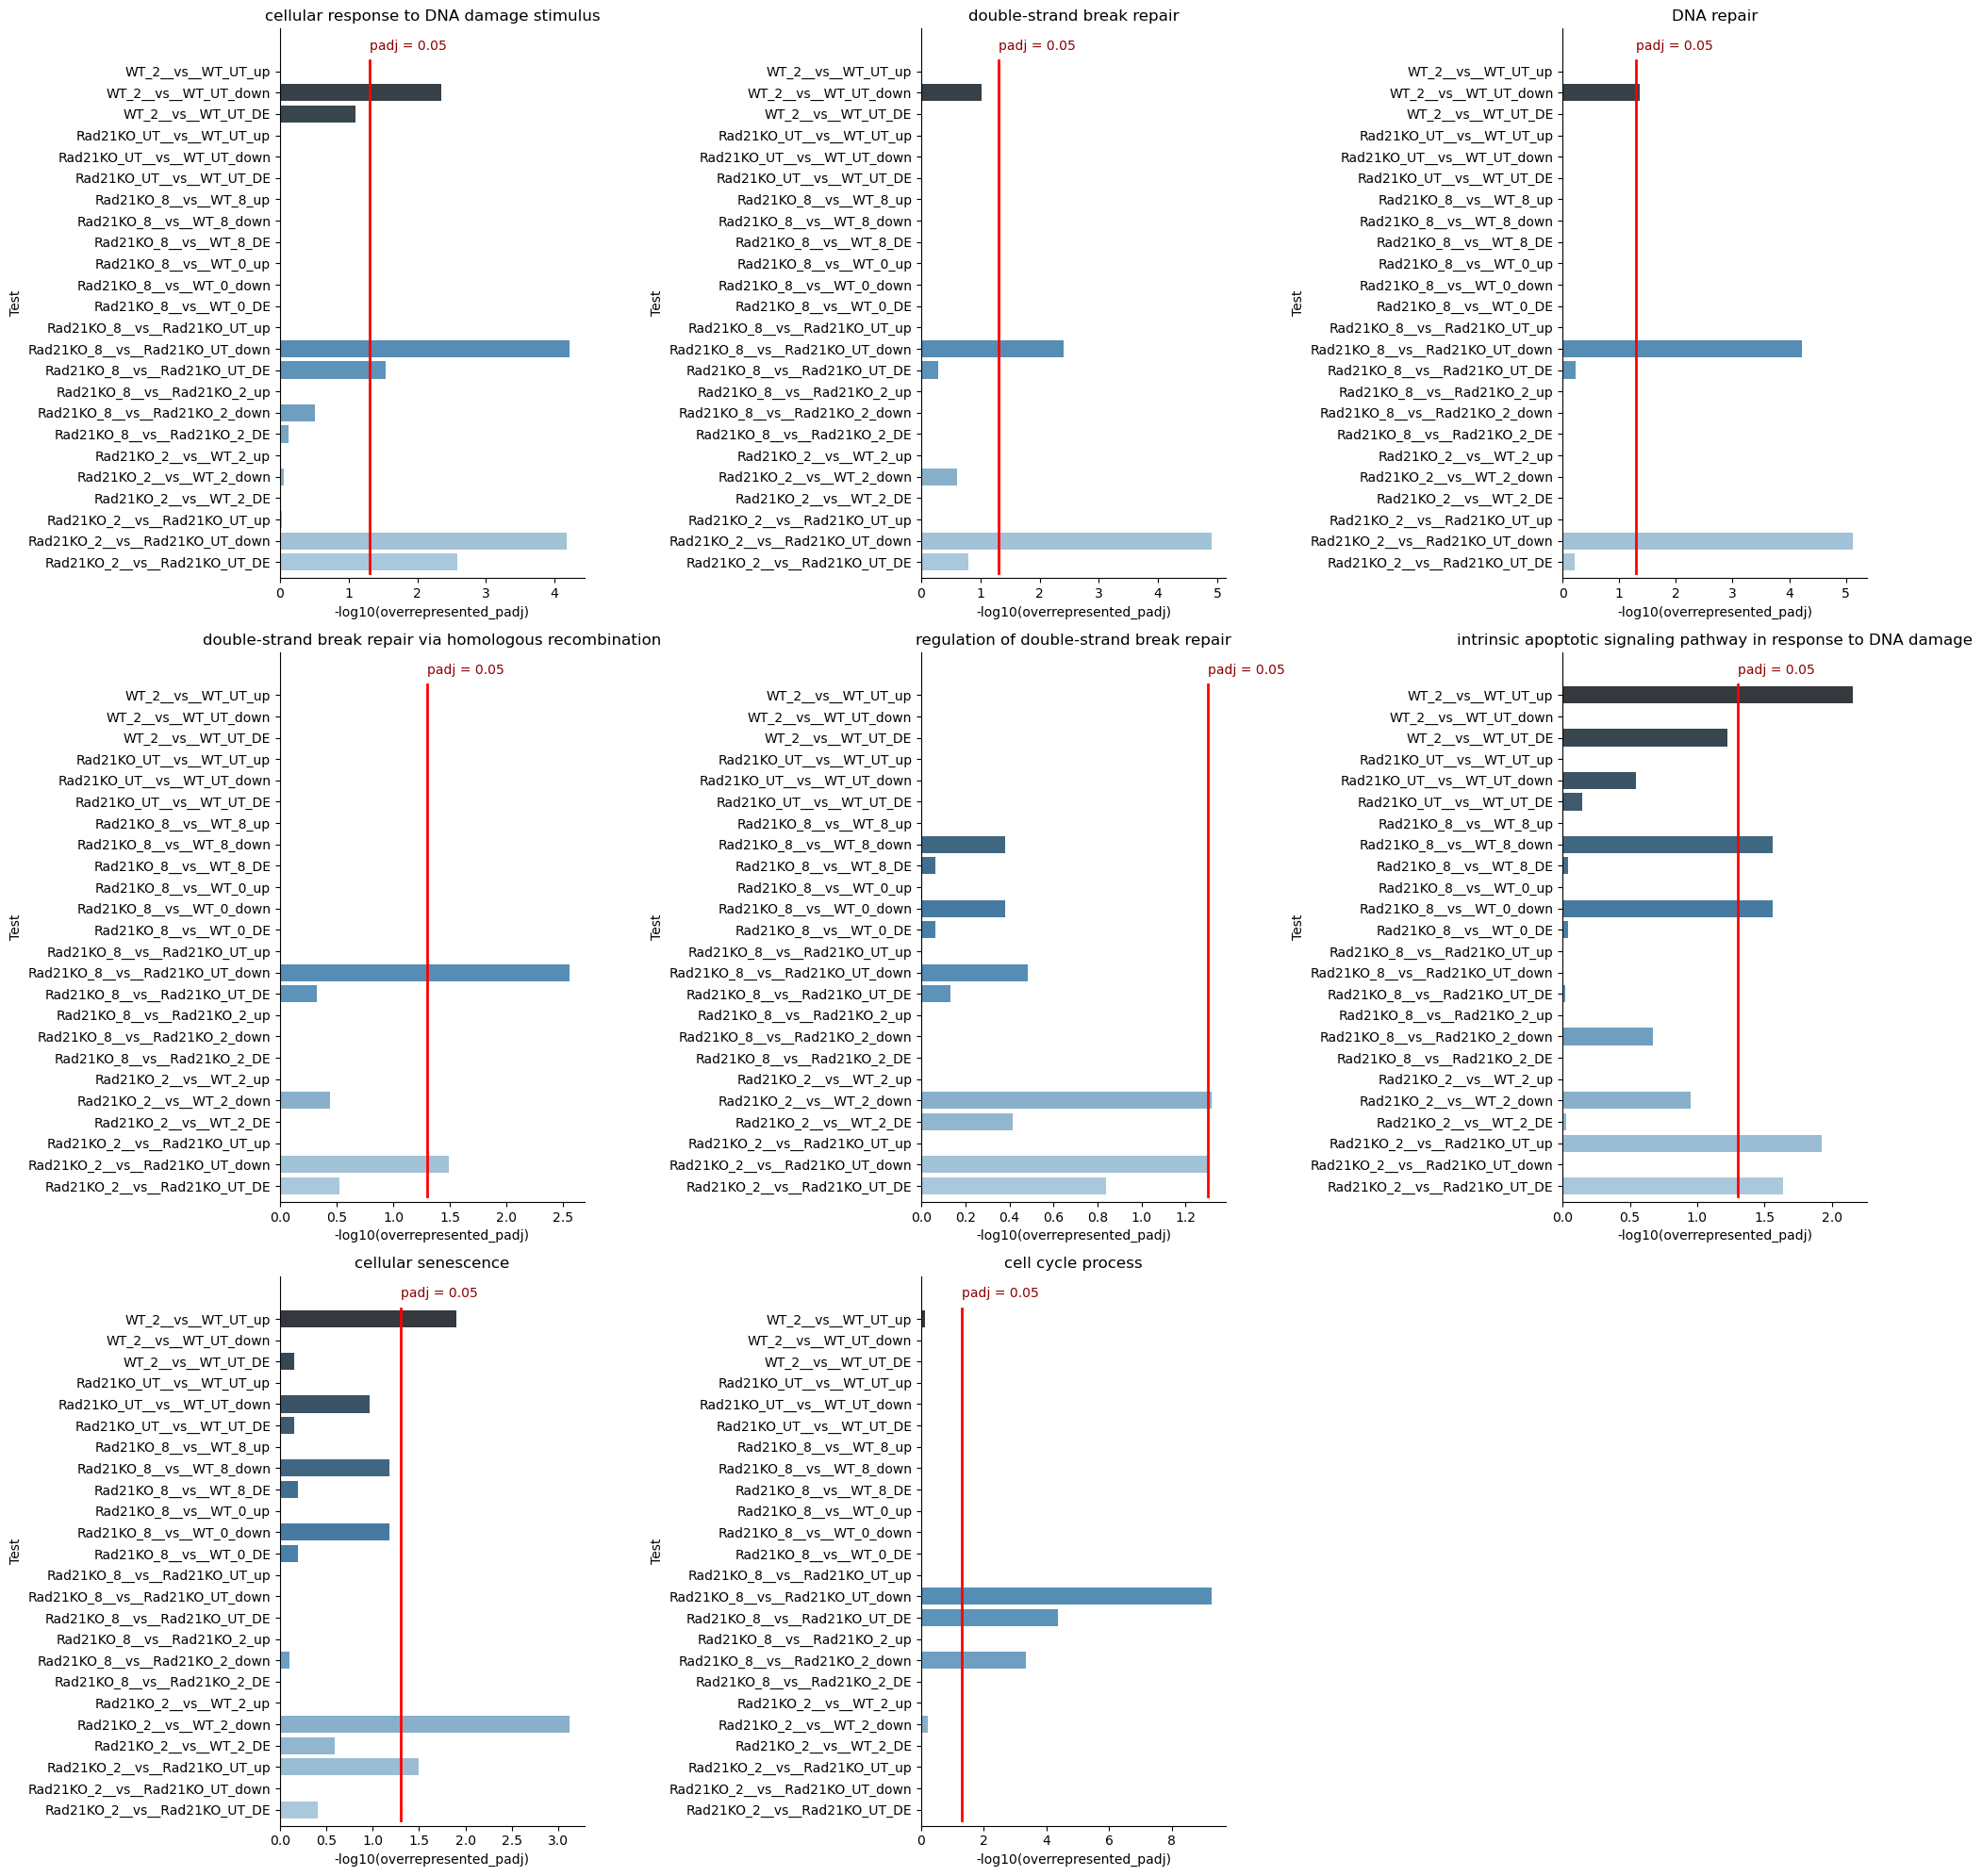

In [5]:
tbs = readdir()
tbs = tbs[[endswith(ii, "goseq.csv") for ii in tbs]]

over_represented_pvalue = []
under_represented_pvalue = []
pvalue = []
ENV["COLUMNS"] = 10000
for ii in tbs
    df = CSV.read(ii, DataFrames.DataFrame)
    df[!,:Test] = [split(ii, "__go")[1] for a in 1:nrow(df)]
    CSV.write(ii, df)
end

maxitb = CSV.read(tbs, DataFrames.DataFrame)


figure(figsize = (20, 20))

subplot(3, 3, 1)
goterm = "GO:0006974"
plot_category(goterm)
subplot(3, 3, 2)
goterm = "GO:0006302"
plot_category(goterm)
subplot(3, 3, 3)
goterm = "GO:0006281"
plot_category(goterm)
subplot(3, 3, 4)
goterm = "GO:0000724"
plot_category(goterm)
subplot(3, 3, 5)
goterm = "GO:2000779"
plot_category(goterm)

subplot(3, 3, 6)
goterm = "GO:0008630"
plot_category(goterm)
subplot(3, 3, 7)
goterm = "GO:0090398"
plot_category(goterm)

subplot(3, 3, 8)
goterm = "GO:0022402"
plot_category(goterm)

plt.tight_layout()

┌ Info: Precompiling MSigDB [top-level]
└ @ Base loading.jl:1342
┌ Warning: Package RNAseq_v2 does not have NoLongerProblems in its dependencies:
│ - If you have RNAseq_v2 checked out for development and have
│   added NoLongerProblems as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RNAseq_v2
└ Loading NoLongerProblems into RNAseq_v2 from project dependency, future warnings for RNAseq_v2 are suppressed.
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Bhatt2012 [top-level]
│   exception = Required dependency RNAseq_v2 [9d111bae-1403-46bf-ac36-f1bdca1b02ac] failed to load from a cache file.
└ @ Base loading.jl:1055
┌ Warning: Package RNAseq_v2 does not have NoLongerProblems in its dependencies:
│ - If you have RNAseq_v2 checked out for development and have
│   added NoLongerProblems as a dependency but haven't updated your primary
│   environm

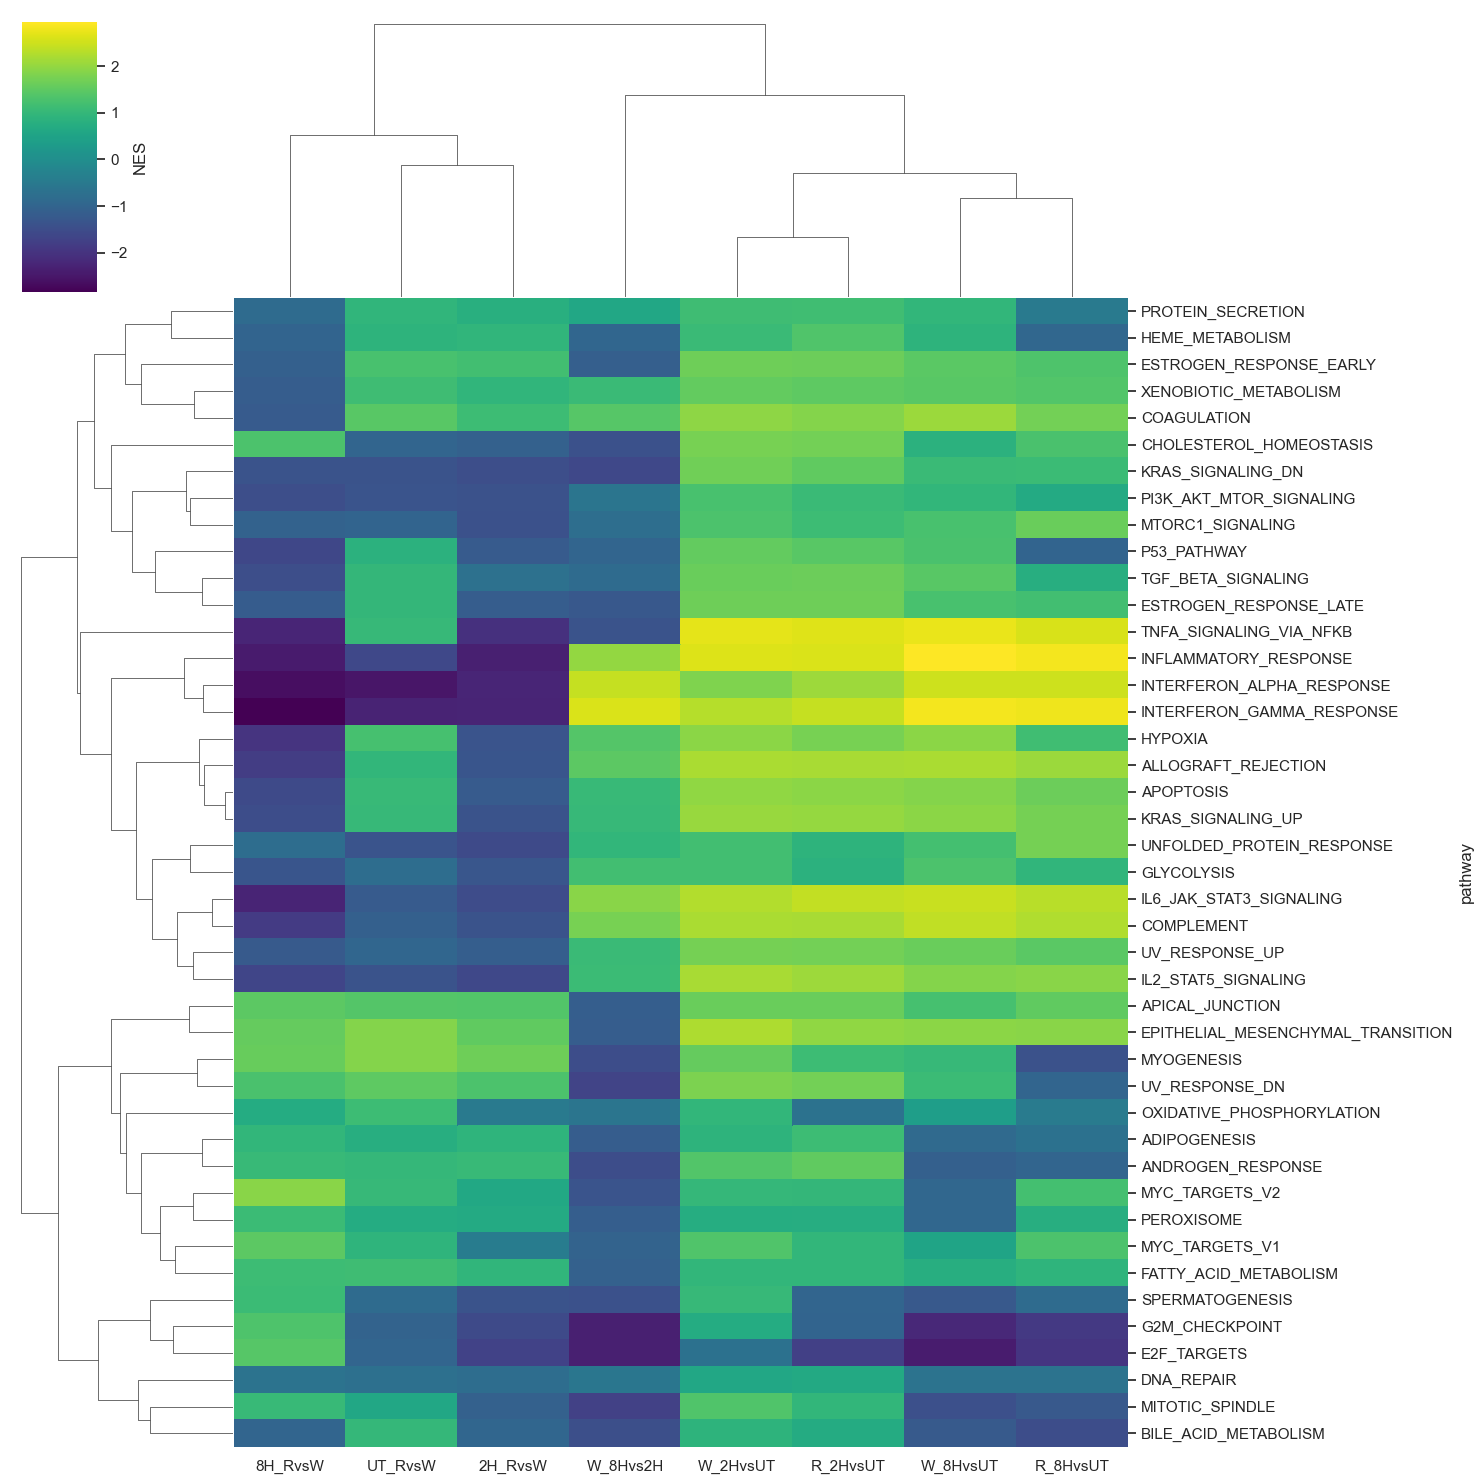

/Users/irr15/.julia/packages/PyCall/3fwVL/src/pyeval.jl:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


In [6]:

include("4_GSEA.jl")


rad21wtg = do_Hallmarks_GSEA(rad21wt; mouse_ensemblID = :EnsemblID)
rad21wt_2g = do_Hallmarks_GSEA(rad21wt_2; mouse_ensemblID = :EnsemblID)
rad21wt_8g = do_Hallmarks_GSEA(rad21wt_8; mouse_ensemblID = :EnsemblID) 
wt_2g = do_Hallmarks_GSEA(wt_2; mouse_ensemblID = :EnsemblID)
wt_28g = do_Hallmarks_GSEA(wt_28; mouse_ensemblID = :EnsemblID)

wt_8g = do_Hallmarks_GSEA(wt_8; mouse_ensemblID = :EnsemblID)
rad21_2g = do_Hallmarks_GSEA(rad21_2; mouse_ensemblID = :EnsemblID) 
rad21_8g = do_Hallmarks_GSEA(rad21_8; mouse_ensemblID = :EnsemblID) 


tb = joinGSEASforTable(
    rad21wtg, rad21wt_2g, rad21wt_8g,wt_2g,wt_8g,rad21_2g,rad21_8g,wt_28g,
    names = ["UT_RvsW", "2H_RvsW", "8H_RvsW", "W_2HvsUT", "W_8HvsUT", "R_2HvsUT",  "R_8HvsUT","W_8Hvs2H"])

CSV.write("Hallmark_GSEA.csv",tb)

py"""
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("Hallmark_GSEA.csv", index_col = "pathway")
ax = sns.clustermap(df, cmap="viridis", cbar_kws={'label': 'NES'}, figsize =(15, 15))
plt.show()
ax.savefig("Hallmark_GSEA_AllSystems.svg")"""

In [7]:
include("4_GSEA.jl")


tb = joinGSEASforTable(
    rad21wtg, rad21wt_2g, rad21wt_8g,
    names = ["UT_RvsW", "2H_RvsW", "8H_RvsW"])


tb2 = joinGSEASforTable_padj(
    rad21wtg, rad21wt_2g, rad21wt_8g,
    names = ["UT_RvsW", "2H_RvsW", "8H_RvsW"])




interest = [
    "G2M_CHECKPOINT",
    "E2F_TARGETS",
    "DNA_REPAIR",
    "UV_RESPONSE_UP",
    "UV_RESPONSE_DN",
    "INFLAMMATORY_RESPONSE",
    "INTERFERON_ALPHA_RESPONSE",
    "INTERFERON_GAMMA_RESPONSE",
    "IL2_STAT5_SIGNALING"
]

interestind = [findfirst(x -> ii==x, tb[!,:pathway]) for ii in interest] 
tb2

,pathway,UT_RvsW,2H_RvsW,8H_RvsW
,String,Float64,Float64,Float64
1,TNFA_SIGNALING_VIA_NFKB,0.696126,0.00181665,0.000978451
2,HYPOXIA,0.289487,0.057515,0.000978451
3,CHOLESTEROL_HOMEOSTASIS,0.71152,0.469652,0.133237
4,MITOTIC_SPINDLE,0.999732,0.394851,0.360121
5,TGF_BETA_SIGNALING,0.71152,1.0,0.052441
6,IL6_JAK_STAT3_SIGNALING,0.44083,0.0514308,0.000978451
7,DNA_REPAIR,0.999732,1.0,0.999229
8,G2M_CHECKPOINT,0.696126,0.00270781,0.04628
9,APOPTOSIS,0.696126,0.19554,0.00719156


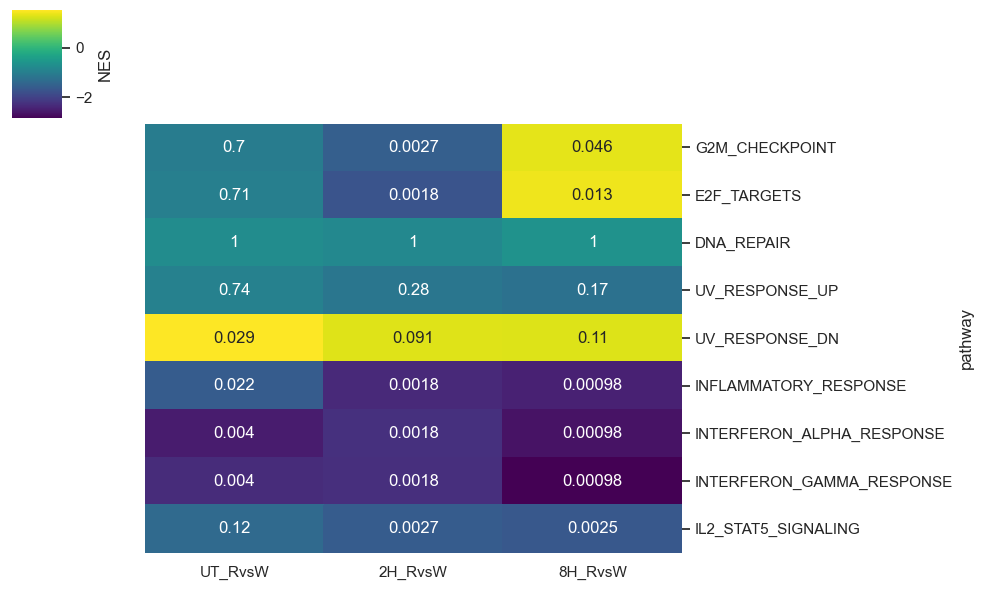

/Users/irr15/.julia/packages/PyCall/3fwVL/src/pyeval.jl:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  get!(_namespaces, m) do


In [8]:
CSV.write("Hallmark_GSEA2.csv",tb[interestind, :])
CSV.write("Hallmark_GSEA2padj.csv",tb2[interestind, :])

py"""
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Hallmark_GSEA2.csv", index_col = "pathway")
df2 = pd.read_csv("Hallmark_GSEA2padj.csv", index_col = "pathway")
ax = sns.clustermap(df, cmap="viridis", col_cluster = 0, row_cluster = 0,cbar_kws={'label': 'NES'}, annot = df2,figsize =(10, 6))
plt.show()
ax.savefig("Hallmark_GSEA_short.svg" )"""

In [9]:
import Pkg; Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [7e6ae17a] BioSequences v2.0.5
  [336ed68f] CSV v0.9.11
  [8f4d0f93] Conda v1.5.2
  [a93c6f00] DataFrames v1.2.2
  [31c24e10] Distributions v0.25.28
  [c2308a5c] FASTX v1.2.0
  [09f84164] HypothesisTests v0.10.6
  [7073ff75] IJulia v1.23.2
  [916415d5] Images v0.24.1
  [f8716d33] MultipleTesting v0.5.0
  [92933f4c] ProgressMeter v1.7.1
  [438e738f] PyCall v1.92.5
  [d330b81b] PyPlot v2.10.0
  [6f49c342] RCall v0.13.12
  [d2ef9438] Seaborn v1.0.0
  [2913bbd2] StatsBase v0.33.13
